In [753]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [754]:
df= pd.read_csv('cancer.csv')

Explore Data

In [755]:
df.head()

,Age,Race,Marital Status,N_stage,6th_stage,differentiate,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [756]:
df.tail()

,Age,Race,Marital Status,N_stage,6th_stage,differentiate,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [757]:
df.sample(5)

,Age,Race,Marital Status,N_stage,6th_stage,differentiate,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
554,46,White,Single,N1,IIB,Poorly differentiated,3,Regional,40,Positive,Positive,14,2,91,Alive
3075,49,White,Separated,N1,IIA,Moderately differentiated,2,Regional,3,Positive,Positive,11,1,54,Alive
813,58,White,Married,N1,IIB,Poorly differentiated,3,Regional,25,Positive,Positive,20,3,101,Alive
620,38,Other,Divorced,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,6,1,88,Dead
1467,52,White,Married,N1,IIIA,Moderately differentiated,2,Regional,70,Positive,Positive,27,2,79,Alive


In [758]:
df.shape

(4024, 15)

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   N_stage                 4024 non-null   object
 4   6th_stage               4024 non-null   object
 5   differentiate           4024 non-null   object
 6   Grade                   4024 non-null   int64 
 7   A_stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [760]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
N_stage                   0
6th_stage                 0
differentiate             0
Grade                     0
A_stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [761]:
df.describe()

,Age,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,2.150596,30.473658,14.357107,4.158052,71.297962
std,8.963134,0.638234,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,4.000000,140.000000,61.000000,46.000000,107.000000


Analysis

In [762]:
df.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

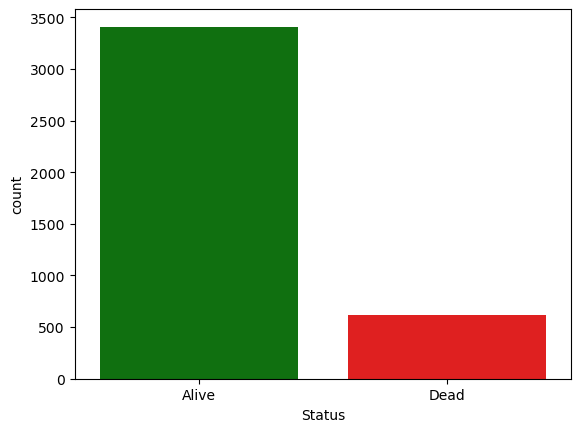

In [763]:
sns.countplot(x='Status',data=df,palette=['g','r'])

Transform Data

In [764]:
df.head()

,Age,Race,Marital Status,N_stage,6th_stage,differentiate,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [765]:
df['Grade'].value_counts()

Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

In [766]:

mapping = {'White': 0, 'Other': 1, 'Black': 2}  
df['Race'] = df['Race'].map(mapping)

mapping = {'Married': 0, 'Single': 1, 'Divorced': 2,'Widowed':3,'Separated':4}  
df['Marital Status'] = df['Marital Status'].map(mapping)

mapping = {'N1': 0, 'N2': 1, 'N3': 2}  
df['N_stage'] = df['N_stage'].map(mapping)

mapping = {'IIA': 0, 'IIIA': 1, 'IIIC': 2,'IIB':3,'IIIB':4}  
df['6th_stage'] = df['6th_stage'].map(mapping)

mapping = {'Moderately differentiated': 0, 'Poorly differentiated': 1, 'Well differentiated': 2,'Undifferentiated':3}  
df['differentiate'] = df['differentiate'].map(mapping)

mapping = {'Regional': 0, 'Distant': 1}
df['A_stage'] = df['A_stage'].map(mapping)

mapping = {'Negative': 0, 'Positive': 1}  
df['Estrogen Status'] = df['Estrogen Status'].map(mapping)


mapping = {'Negative': 0, 'Positive': 1}  
df['Progesterone Status'] = df['Progesterone Status'].map(mapping)

mapping = {'Dead': 0, 'Alive': 1}  
df['Status'] = df['Status'].map(mapping)


In [767]:
'''
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

obj=df.select_dtypes(include='object')
non_obj = df.select_dtypes(exclude='object')

for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=label.fit_transform(obj.iloc[:,i])

obj = obj.astype(int)

dff = pd.concat([non_obj,obj],axis=1)
dff.head()
'''

"\nfrom sklearn.preprocessing import LabelEncoder\nlabel = LabelEncoder()\n\nobj=df.select_dtypes(include='object')\nnon_obj = df.select_dtypes(exclude='object')\n\nfor i in range(0,obj.shape[1]):\n    obj.iloc[:,i]=label.fit_transform(obj.iloc[:,i])\n\nobj = obj.astype(int)\n\ndff = pd.concat([non_obj,obj],axis=1)\ndff.head()\n"

In [768]:
df.isnull().sum()

Age                         0
Race                        0
Marital Status            615
N_stage                     0
6th_stage                   0
differentiate               0
Grade                       0
A_stage                     0
Tumor Size                  0
Estrogen Status             0
Progesterone Status         0
Regional Node Examined      0
Reginol Node Positive       0
Survival Months             0
Status                      0
dtype: int64

In [769]:
m=df['Marital Status'].median()
df['Marital Status'].fillna(m,inplace=True)
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
N_stage                   0
6th_stage                 0
differentiate             0
Grade                     0
A_stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   int64  
 2   Marital Status          4024 non-null   float64
 3   N_stage                 4024 non-null   int64  
 4   6th_stage               4024 non-null   int64  
 5   differentiate           4024 non-null   int64  
 6   Grade                   4024 non-null   int64  
 7   A_stage                 4024 non-null   int64  
 8   Tumor Size              4024 non-null   int64  
 9   Estrogen Status         4024 non-null   int64  
 10  Progesterone Status     4024 non-null   int64  
 11  Regional Node Examined  4024 non-null   int64  
 12  Reginol Node Positive   4024 non-null   int64  
 13  Survival Months         4024 non-null   int64  
 14  Status                  4024 non-null   

Creat Model

In [771]:
x=df.drop(['Status'],axis=1)
y=df['Status']

In [772]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=1234)

In [773]:
Accuracies = []
Recalls=[]
F_1=[]
Precisions = []

def func(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)
    recall = recall_score(pred,y_test)
    f1 = f1_score(pred,y_test)
    precision = precision_score(pred,y_test)

    Accuracies.append(accuracy)
    Recalls.append(recall)
    F_1.append(f1)
    Precisions.append(precision)

In [774]:
m1=LogisticRegression()
m2=SVC()
m3=RandomForestClassifier()
m4=GradientBoostingClassifier()
m5=KNeighborsClassifier()
m6=XGBClassifier()

In [775]:
func(m1)
func(m2)
func(m3)
func(m4)
func(m5)
func(m6)

In [776]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','XGBClassifier']

In [777]:
result=pd.DataFrame({'Algorithms':columns,'Accuracies':Accuracies,'Recalls':Recalls,'F1':F_1,'Precisions':Precisions})
result

,Algorithms,Accuracies,Recalls,F1,Precisions
0,LogisticRegression,0.885714,0.895302,0.935484,0.979442
1,SVC,0.881988,0.889628,0.933706,0.982379
2,RandomForestClassifier,0.895652,0.911724,0.940256,0.970631
3,GradientBoostingClassifier,0.894410,0.910468,0.939588,0.970631
4,KNeighborsClassifier,0.884472,0.897297,0.934553,0.975037
5,XGBClassifier,0.885714,0.913043,0.934003,0.955947


In [778]:
def class_report(m):
    m.fit(x_train,y_train)
    predd = m.predict(x_test)
    print(classification_report(predd,y_test))

In [779]:
class_report(m1)

              precision    recall  f1-score   support

           0       0.37      0.77      0.50        60
           1       0.98      0.90      0.94       745

    accuracy                           0.89       805
   macro avg       0.68      0.83      0.72       805
weighted avg       0.93      0.89      0.90       805



In [780]:
class_report(m2)

              precision    recall  f1-score   support

           0       0.33      0.77      0.46        53
           1       0.98      0.89      0.93       752

    accuracy                           0.88       805
   macro avg       0.66      0.83      0.70       805
weighted avg       0.94      0.88      0.90       805

